In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['world-happiness-report-2019.csv']


In [2]:
happiness=pd.read_csv("../input/world-happiness-report-2019.csv")
happiness.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [3]:
import matplotlib.pyplot as plt #import plotting modules
import seaborn as sns
%matplotlib inline

In [6]:
happiness["Corruption"].describe()

count    148.000000
mean      74.500000
std       42.868014
min        1.000000
25%       37.750000
50%       74.500000
75%      111.250000
max      148.000000
Name: Corruption, dtype: float64

Corruption is beetween 1 148 it is interesting

Healthy life expectency is interesting metrics we explore further

In [7]:
happiness["Healthy life\nexpectancy"].describe()

count    150.000000
mean      75.500000
std       43.445368
min        1.000000
25%       38.250000
50%       75.500000
75%      112.750000
max      150.000000
Name: Healthy life\nexpectancy, dtype: float64

Where is have 150 years healthy life expectancy ??????????

In [12]:
index=happiness["Healthy life\nexpectancy"].idxmax()
print(happiness.iloc[index,:]) 

Country (region)            Central African Republic
Ladder                                           155
SD of Ladder                                     117
Positive affect                                  132
Negative affect                                  153
Social support                                   155
Freedom                                          133
Corruption                                       122
Generosity                                       113
Log of GDP\nper capita                           152
Healthy life\nexpectancy                         150
Name: 154, dtype: object


Maybe max is the worst in this aspect. 

In [14]:
index=happiness["Healthy life\nexpectancy"].idxmin() 
print(happiness.iloc[index,:]) 

Country (region)            Singapore
Ladder                             34
SD of Ladder                        5
Positive affect                    38
Negative affect                     2
Social support                     36
Freedom                            20
Corruption                          1
Generosity                         21
Log of GDP\nper capita              3
Healthy life\nexpectancy            1
Name: 33, dtype: object


I think all of these value is rank. I hate this rate values

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


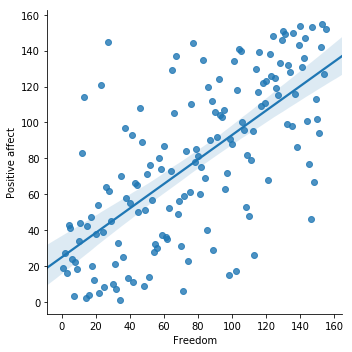

In [16]:
sns.lmplot(data=happiness,x="Freedom",y="Positive affect")

We have interesting plot. Freedom isn't directly related with Positive Affect but have smalll smallrelationship

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


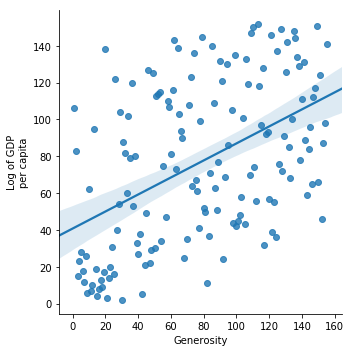

In [21]:
sns.lmplot(data=happiness,x="Generosity",y="Log of GDP\nper capita")

Some least countries also have lowest GDP per capita. İt is not interesting. Most Generous countries is also most GDp countries. Have some outlier but I say this  

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


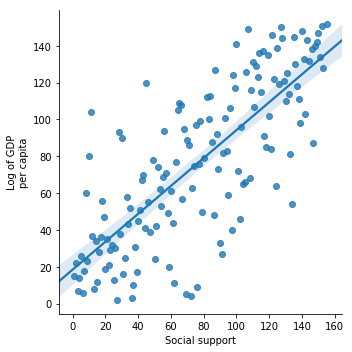

In [22]:
sns.lmplot(data=happiness,x="Social support",y="Log of GDP\nper capita")

We should use corr test in this context.

In [23]:
subset=happiness[["Social support","Log of GDP\nper capita"]]
subset.corr()

,Social support,Log of GDP per capita
Social support,1.000000,0.772912
Log of GDP\nper capita,0.772912,1.000000


Social Support is related to GDP and it's not a suprise. 

Now We create full corrmap.

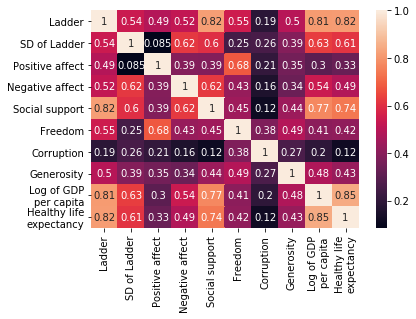

In [26]:
sns.heatmap(happiness.corr(),annot = True)

Ladder is highly related with healthy life expectancy. 
Also Health life expectancy is highly related with GDP.
Ladder and Social support also have high correlation value. 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


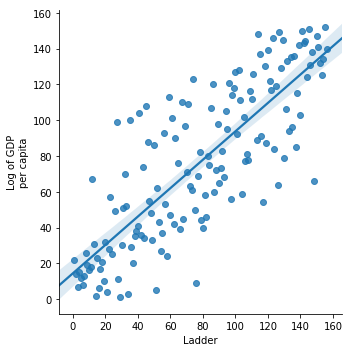

In [27]:
sns.lmplot(data=happiness,x="Ladder",y="Log of GDP\nper capita")

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


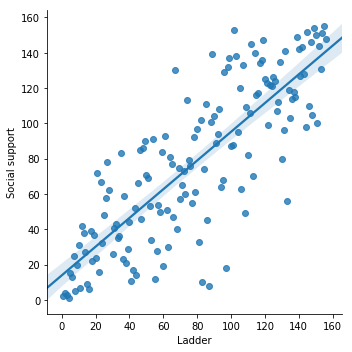

In [28]:
sns.lmplot(data=happiness,x="Ladder",y="Social support")

## Results
* This rank data is not good recognise all correlation clearly.
* I prefer values instead of rank. 
* Some Features is also not important for any aspects.

#### So this data is not very good